# Alzheimer Disease Classification using CNN

# import lib

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import cv2
import numpy as np
import os
import h5py
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Read Data

In [3]:
input_dir = 'input'

In [4]:
class_labels = os.listdir(input_dir)
print(class_labels)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [5]:
wdir_total = 0
for label in class_labels:
    total = len(os.listdir(os.path.join(input_dir, label)))
    print(label, total)
    wdir_total +=total
print('Total-----',wdir_total)

MildDemented 717
ModerateDemented 52
NonDemented 2560
VeryMildDemented 1792
Total----- 5121


In [6]:
nb_samples = wdir_total
num_classes = 4
img_rows= 128
img_cols= 128
channel = 3

# Preprocess the data

In [9]:
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
def load_data():
    labels = os.listdir(input_dir)    
    X = np.ndarray((nb_samples, img_rows, img_cols, channel), dtype = np.uint8)
    y = np.zeros((nb_samples,), dtype = np.uint8)
    i = 0
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(input_dir, label))
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            try:
                img = cv2.imread(os.path.join(input_dir, label, image_name), 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = np.array(cv2.resize(img, (img_rows,img_cols)))
                X[i] = img
                y[i] = j
            except Exception as e:
                pass
            i += 1
        j += 1    
    y = np_utils.to_categorical(y[:nb_samples], num_classes)
    return X, y

In [11]:
X, y = load_data()

MildDemented 717
ModerateDemented 52
NonDemented 2560
VeryMildDemented 1792


In [12]:
print(X.shape, y.shape)

(5121, 128, 128, 3) (5121, 4)


In [13]:
# normalize data
X = X.astype('float32')
X /= 255

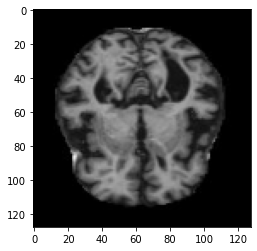

In [14]:
plt.imshow(X[0])

In [15]:
np.random.seed(123)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(64, (3, 3),activation='relu', padding='same', input_shape=(img_rows,img_rows,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer=Adam(lr=0.001, decay=1e-04),
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0

# Train the model

In [22]:
model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=10,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/10
410/410 [==============================] - 280s 683ms/step - loss: 1.0316 - accuracy: 0.5259 - val_loss: 0.8764 - val_accuracy: 0.5746
Epoch 2/10
410/410 [==============================] - 313s 764ms/step - loss: 0.7846 - accuracy: 0.6426 - val_loss: 0.6846 - val_accuracy: 0.7093
Epoch 3/10
410/410 [==============================] - 313s 763ms/step - loss: 0.5621 - accuracy: 0.7583 - val_loss: 0.4630 - val_accuracy: 0.8098
Epoch 4/10
410/410 [==============================] - 314s 766ms/step - loss: 0.3628 - accuracy: 0.8530 - val_loss: 0.2918 - val_accuracy: 0.8956
Epoch 5/10
410/410 [==============================] - 322s 786ms/step - loss: 0.2273 - accuracy: 0.9131 - val_loss: 0.1810 - val_accuracy: 0.9454
Epoch 6/10
410/410 [==============================] - 11188s 27s/step - loss: 0.1427 - accuracy: 0.9451 - val_loss: 0.1058 - val_accuracy: 0.9698
Epoch 7/10
410/410 [==============================] - 261s 636ms/step - loss: 0.0997 - accuracy: 0.9656 - val_loss: 0.0827 -

In [23]:
y_pred = model.predict(X_test, batch_size=10, verbose=0)

In [24]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

1025

In [25]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

1025

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(15,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [27]:
cm_plot_labels = class_labels

In [28]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       159
           1       1.00      1.00      1.00        16
           2       0.96      1.00      0.98       499
           3       0.99      0.92      0.95       351

    accuracy                           0.97      1025
   macro avg       0.97      0.97      0.97      1025
weighted avg       0.97      0.97      0.97      1025



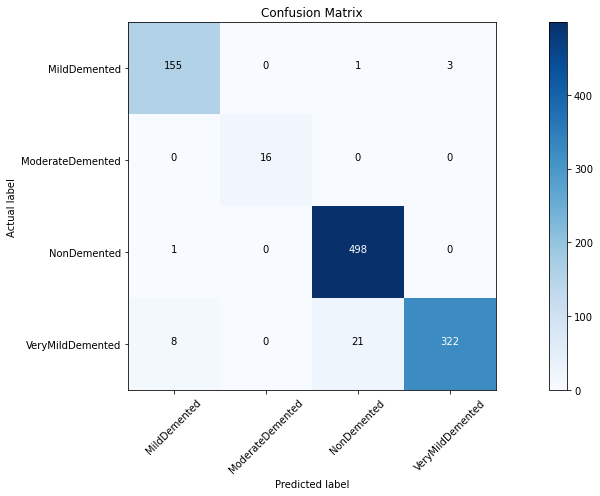

In [29]:
# to plot confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [30]:
score = model.evaluate(x= X_test, y= y_test, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

33/33 [==============================] - 11s 325ms/step - loss: 0.1182 - accuracy: 0.9668
Loss Value :  0.11823910474777222
Accuracy :  0.966829240322113


In [31]:
model_structure = model.to_json()
f = Path("model/model_structure_main.json")
f.write_text(model_structure)

3123

In [32]:
model.save_weights("model/model_weights_main.h5")

# Thank You !